In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lb
import librosa.display as  ldisplay
from IPython.display import Audio

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D,MaxPooling1D,Flatten, Dropout, BatchNormalization
from keras import Input
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.utils import np_utils
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
feature_emotion_df=pd.read_csv('/content/drive/MyDrive/praneeth/Feature_extracted_dataset (3).csv')

In [ ]:
feature_emotion_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2259,2260,2261,2262,2263,2264,2265,2266,2267,Emotion
0,0.065430,0.071289,0.071289,0.052246,0.048340,0.106445,0.171387,0.228027,0.248047,0.235840,...,24.838633,12.986765,-14.747004,4.591933,-2.150724,-12.089533,-12.665945,-0.801496,-16.449780,angry
1,0.262207,0.386230,0.518555,0.517090,0.508789,0.520020,0.510254,0.519043,0.515625,0.512695,...,15.930484,9.471877,-1.277585,-0.975825,-2.921517,-10.849216,-8.569133,-8.426794,-10.460051,angry
2,0.063965,0.068359,0.068359,0.058594,0.073242,0.135742,0.201172,0.257324,0.236816,0.213379,...,28.065681,3.222074,-19.927702,-0.588958,-7.595579,-5.199802,-9.166500,0.022583,-5.449619,angry
3,0.209473,0.254883,0.254883,0.176758,0.132324,0.174316,0.263184,0.332520,0.323730,0.304688,...,25.137230,4.358447,-16.416542,2.289107,-5.057943,-11.831305,-7.739297,-2.064261,-14.117687,angry
4,0.044922,0.061035,0.076172,0.066406,0.069336,0.065918,0.070801,0.055664,0.052734,0.063477,...,2.206598,9.609125,-10.786152,4.056137,14.608828,8.215265,1.501894,8.435717,6.355412,fear


In [ ]:
feature_emotion_df.shape

(38968, 2269)

In [ ]:
feature_emotion_df= feature_emotion_df.fillna(0)
feature_emotion_df.shape

(38968, 2269)

In [ ]:
X=feature_emotion_df.iloc[:,:-1].values
Y=feature_emotion_df.iloc[:,-1].values
X

array([[ 6.54296875e-02,  7.12890625e-02,  7.12890625e-02, ...,
        -1.26659451e+01, -8.01496029e-01, -1.64497795e+01],
       [ 2.62207031e-01,  3.86230469e-01,  5.18554688e-01, ...,
        -8.56913298e+00, -8.42679413e+00, -1.04600506e+01],
       [ 6.39648438e-02,  6.83593750e-02,  6.83593750e-02, ...,
        -9.16650009e+00,  2.25828886e-02, -5.44961882e+00],
       ...,
       [ 2.63671875e-02,  4.19921875e-02,  5.61523438e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.46484375e-02,  1.90429688e-02,  2.44140625e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.46484375e-02,  2.00195312e-02,  2.53906250e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
X

array([[ 6.54296875e-02,  7.12890625e-02,  7.12890625e-02, ...,
        -1.26659451e+01, -8.01496029e-01, -1.64497795e+01],
       [ 2.62207031e-01,  3.86230469e-01,  5.18554688e-01, ...,
        -8.56913298e+00, -8.42679413e+00, -1.04600506e+01],
       [ 6.39648438e-02,  6.83593750e-02,  6.83593750e-02, ...,
        -9.16650009e+00,  2.25828886e-02, -5.44961882e+00],
       ...,
       [ 2.63671875e-02,  4.19921875e-02,  5.61523438e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.46484375e-02,  1.90429688e-02,  2.44140625e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.46484375e-02,  2.00195312e-02,  2.53906250e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
LE = LabelEncoder()
Y = np_utils.to_categorical(LE.fit_transform(Y))

In [ ]:
Y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.07,random_state=40)
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.25,random_state=40)

In [ ]:
x_train.shape,y_train.shape,x_validation.shape,y_validation.shape,x_test.shape,y_test.shape

((27180, 2268), (27180, 6), (9060, 2268), (9060, 6), (2728, 2268), (2728, 6))

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_validation=sc.transform(x_validation)

In [ ]:
x_train=np.expand_dims(x_train,axis=2)
x_test=np.expand_dims(x_test,axis=2)
x_validation=np.expand_dims(x_validation,axis=2)

In [ ]:
x_train.shape,y_train.shape,x_validation.shape,y_validation.shape,x_test.shape,y_test.shape

((27180, 2268, 1),
 (27180, 6),
 (9060, 2268, 1),
 (9060, 6),
 (2728, 2268, 1),
 (2728, 6))

In [ ]:
x_train.shape[1]

2268

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv1D(128,5,activation='relu',input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4,strides=2,padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(256,5,activation='relu',padding='same'))
model.add(Conv1D(256,5,activation='relu',padding='same'))
model.add(Conv1D(256,5,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4,strides=2))
model.add(Dropout(0.2))

model.add(Conv1D(512,5,activation='relu',padding='same'))
model.add(Conv1D(512,5,activation='relu',padding='same'))
model.add(Conv1D(512,5,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4,strides=2))
model.add(Dropout(0.2))

model.add(Conv1D(128,3,activation='relu',padding='same'))
model.add(Conv1D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4,strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy',f1_m])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2264, 128)         768       
                                                                 
 batch_normalization (BatchN  (None, 2264, 128)        512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1132, 128)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1132, 128)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1132, 256)         164096    
                                                                 
 conv1d_2 (Conv1D)           (None, 1132, 256)         3

In [ ]:
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
history=model.fit(x_train,y_train,batch_size=64,epochs=18,validation_data=(x_validation,y_validation),
          validation_batch_size=32, callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/18
425/425 [==============================] - 170s 370ms/step - loss: 1.4733 - accuracy: 0.4048 - f1_m: 0.2768 - val_loss: 2.1243 - val_accuracy: 0.3113 - val_f1_m: 0.2701 - lr: 0.0010
Epoch 2/18
425/425 [==============================] - 167s 393ms/step - loss: 1.2707 - accuracy: 0.4924 - f1_m: 0.4036 - val_loss: 1.2745 - val_accuracy: 0.5045 - val_f1_m: 0.4499 - lr: 0.0010
Epoch 3/18
425/425 [==============================] - 167s 392ms/step - loss: 1.1707 - accuracy: 0.5389 - f1_m: 0.4650 - val_loss: 1.2793 - val_accuracy: 0.5105 - val_f1_m: 0.4736 - lr: 0.0010
Epoch 4/18
425/425 [==============================] - 168s 395ms/step - loss: 1.0794 - accuracy: 0.5744 - f1_m: 0.5212 - val_loss: 1.0635 - val_accuracy: 0.5777 - val_f1_m: 0.5165 - lr: 0.0010
Epoch 5/18
425/425 [==============================] - 168s 396ms/step - loss: 0.9965 - accuracy: 0.6152 - f1_m: 0.5691 - val_loss: 1.0739 - val_accuracy: 0.5911 - val_f1_m: 0.5498 - lr: 0.0010
Epoch 6/18
425/425 [===============

In [ ]:
model.save('ser_cnn1d.h5')

86/86 [==============================] - 5s 59ms/step - loss: 0.2511 - accuracy: 0.9373 - f1_m: 0.9389
Accuracy of our model on test data :  93.73167157173157 %


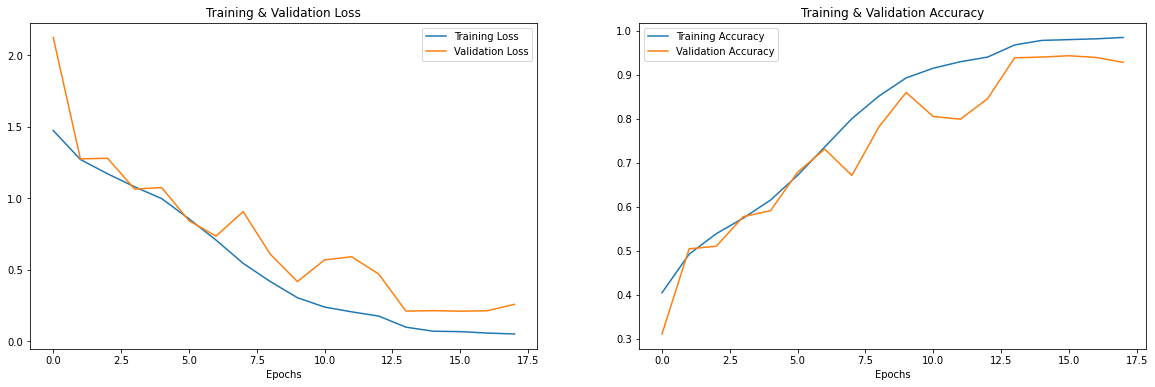

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model.save('best_model.hdf5')